<a href="https://colab.research.google.com/github/enps2015/i2a2_tarefa3/blob/main/C%C3%B3digo_de_An%C3%A1lise_Explorat%C3%B3ria_(EDA)_Miss%C3%A3o_Amaz%C3%B4nia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- Fase 0: A Preparação do Templo (Importação das Bibliotecas) ---
# Como um Jedi prepara seu templo para a meditação, nós preparamos nosso ambiente.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
# Configurações para uma visualização mais clara e elegante
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
warnings.filterwarnings('ignore')

print("Bibliotecas carregadas. O ambiente está pronto.")

Bibliotecas carregadas. O ambiente está pronto.


In [11]:
# --- Fase 1: A Convocação dos Dados (Carregamento) ---
# Invocamos as duas correntes de dados para que se manifestem em nossa realidade.
try:
    df_clima = pd.read_csv('base_climatica.csv')
    df_socio = pd.read_csv('base_socioeconomica.csv')
    print("Bases de dados convocadas com sucesso.")
    print("\nAmostra da Base Climática:")
    print(df_clima.head())
    print("\nAmostra da Base Socioeconômica:")
    print(df_socio.head())
except FileNotFoundError as e:
    print(f"Erro na convocação: {e}. Verifique se os arquivos estão no mesmo diretório.")
    # Encerra a execução se os arquivos não forem encontrados
    exit()

Bases de dados convocadas com sucesso.

Amostra da Base Climática:
         data  chuvas_previstas_mm  chuvas_reais_mm  temperatura_media_C  \
0  2025-01-01                109.8            110.0                 34.7   
1  2025-01-02                143.0            178.7                 27.2   
2  2025-01-03                120.6            123.1                 27.5   
3  2025-01-04                109.0            117.0                 29.6   
4  2025-03-28                104.6             91.7                 31.4   

  variacao_climatica  indice_umidade_solo  
0                sim                 45.9  
1                nao                 34.4  
2                sim                 77.1  
3                nao                 29.0  
4                nao                 45.4  

Amostra da Base Socioeconômica:
         data  volume_producao_tons  incidencia_doencas acesso_agua_potavel  \
0  2025-01-01                  8.63                 0.0                 não   
1  2025-01-02        

In [13]:
# --- Fase 2: A Purificação (Limpeza e Pré-processamento) ---
# Aqui, usamos a Força para limpar os dados, como um rio que purifica suas águas.

# 2.1. Harmonização Temporal e Fusão
print("\n--- Iniciando a Fase de Purificação ---")
df_clima['data'] = pd.to_datetime(df_clima['data'], errors='coerce')
df_socio['data'] = pd.to_datetime(df_socio['data'], errors='coerce')

# Unimos as duas realidades em uma só, através do elo do tempo.
df = pd.merge(df_clima, df_socio, on='data', how='outer')
print("Bases de dados unificadas pelo fluxo do tempo (data).")

# 2.2. Tratamento de Duplicatas
duplicatas_antes = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"Foram encontrados e removidos {duplicatas_antes} registros duplicados.")

# 2.3. Padronização Categórica
# Unificamos as respostas para que 'não' e 'nao' vibrem na mesma frequência.
for col in ['variacao_climatica', 'acesso_agua_potavel']:
    if col in df.columns:
        df[col] = df[col].str.lower().replace({'nao': 'não'})
        print(f"Valores únicos em '{col}' após padronização: {df[col].unique()}")

# 2.4. Gestão de Dados Ausentes (Preenchendo o Vazio)
print("\nAnalisando dados ausentes (o vazio):")
print(df.isnull().sum())

# Para variáveis numéricas, usaremos a mediana, que é menos sensível a outliers (perturbações na Força).
for col in ['chuvas_reais_mm', 'volume_producao_tons', 'temperatura_media_C', 'indice_umidade_solo', 'incidencia_doencas', 'indicador_seguranca_alimentar']:
    if df[col].isnull().any():
        mediana = df[col].median()
        df[col].fillna(mediana, inplace=True)
        print(f"Valores ausentes em '{col}' preenchidos com a mediana ({mediana:.2f}).")

# Para variáveis categóricas, usaremos a moda (o arquétipo mais comum).
for col in ['variacao_climatica', 'acesso_agua_potavel']:
     if df[col].isnull().any():
        moda = df[col].mode()[0]
        df[col].fillna(moda, inplace=True)
        print(f"Valores ausentes em '{col}' preenchidos com a moda ('{moda}').")

# Removemos linhas onde a data é nula, pois são o nosso eixo fundamental
df.dropna(subset=['data'], inplace=True)

# 2.5. Domando os Outliers (As Anomalias da Força)
# O caso dos 700mm de chuva: uma anomalia que precisa ser compreendida.
# Uma chuva tão extrema é provavelmente um erro de registro. Vamos investigar.
limite_chuva_realista = 250 # Um limite generoso para chuvas extremas na Amazônia
outliers_chuva = df[df['chuvas_reais_mm'] > limite_chuva_realista]
print(f"\nForam encontrados {len(outliers_chuva)} registros de chuva acima de {limite_chuva_realista}mm.")

# Uma estratégia é substituir pela chuva prevista para aquele dia, ou pela mediana.
# Adotaremos uma abordagem de "capping" (limitação), considerando que pode ter sido um evento extremo, mas mal registrado.
df['chuvas_reais_mm'] = df['chuvas_reais_mm'].apply(lambda x: limite_chuva_realista if x > limite_chuva_realista else x)
print(f"Outliers de chuva foram ajustados para o limite de {limite_chuva_realista}mm.")

print("\n--- Purificação Concluída. Os dados estão prontos para a meditação. ---")
print("\nInformações do Dataset Final:")
df.info()
print("\nEstatísticas Descritivas do Dataset Final:")
print(df.describe())


--- Iniciando a Fase de Purificação ---
Bases de dados unificadas pelo fluxo do tempo (data).
Foram encontrados e removidos 20 registros duplicados.
Valores únicos em 'variacao_climatica' após padronização: ['sim' 'não' nan]
Valores únicos em 'acesso_agua_potavel' após padronização: ['não' 'sim' nan]

Analisando dados ausentes (o vazio):
data                              0
chuvas_previstas_mm               9
chuvas_reais_mm                  12
temperatura_media_C              11
variacao_climatica                9
indice_umidade_solo              13
volume_producao_tons             14
incidencia_doencas               14
acesso_agua_potavel               9
indicador_seguranca_alimentar     9
dtype: int64
Valores ausentes em 'chuvas_reais_mm' preenchidos com a mediana (107.00).
Valores ausentes em 'volume_producao_tons' preenchidos com a mediana (10.78).
Valores ausentes em 'temperatura_media_C' preenchidos com a mediana (26.90).
Valores ausentes em 'indice_umidade_solo' preenchidos com


--- Iniciando a Fase de Análise Exploratória (EDA) ---


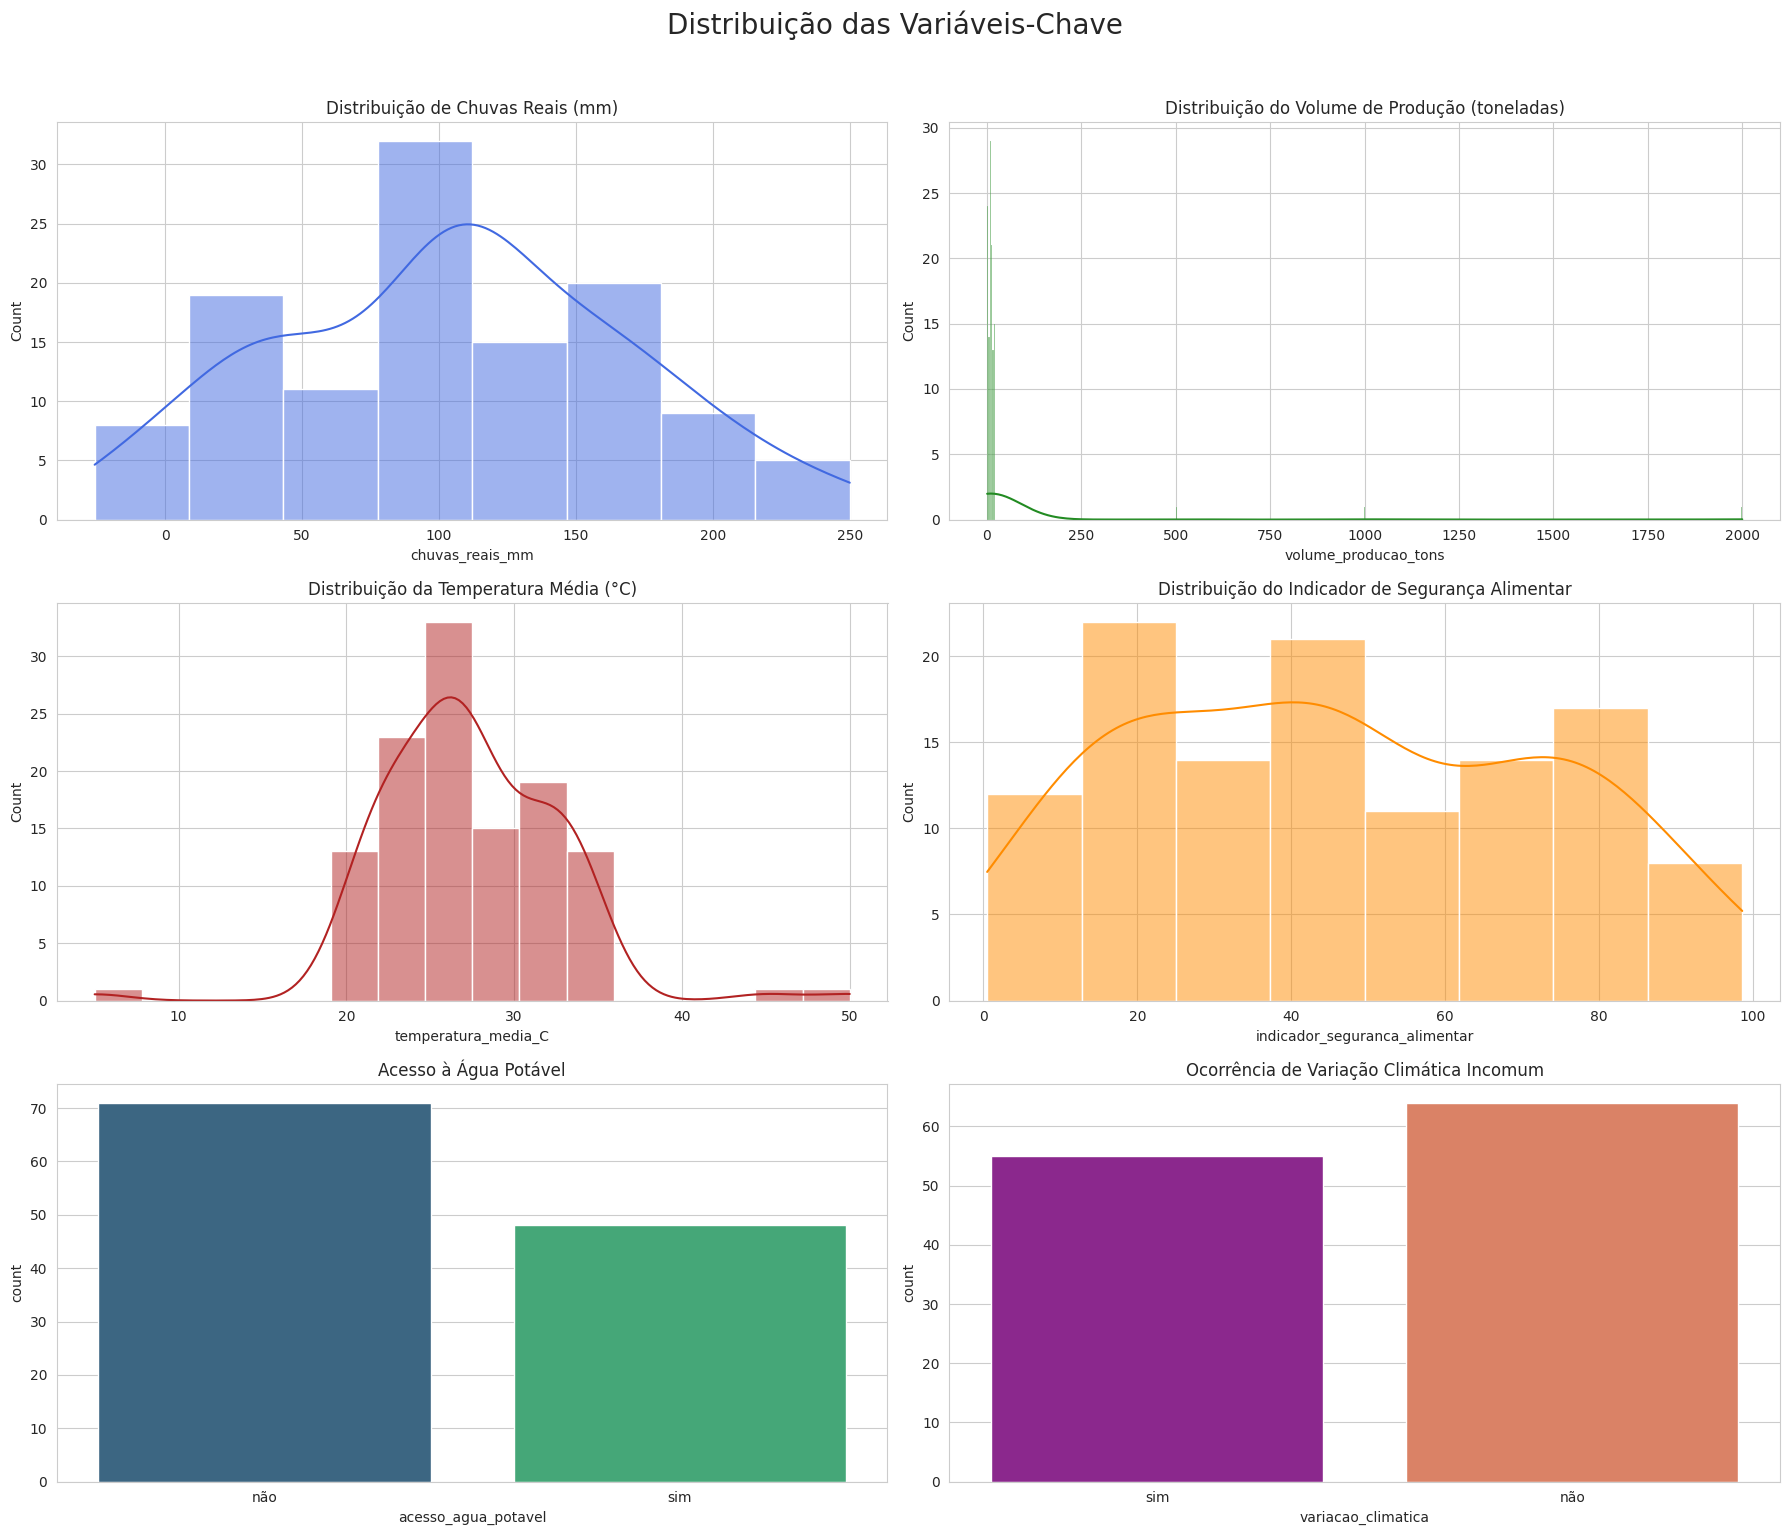

In [19]:

# --- Fase 3: A Análise Exploratória (A Meditação sobre os Padrões) ---
# Agora, meditamos sobre os dados e ouvimos as histórias que eles nos contam.

print("\n--- Iniciando a Fase de Análise Exploratória (EDA) ---")

# 3.1. Análise Univariada (Entendendo cada Elemento)
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Distribuição das Variáveis-Chave', fontsize=20, y=1.02)

sns.histplot(df['chuvas_reais_mm'], kde=True, ax=axes[0, 0], color='royalblue')
axes[0, 0].set_title('Distribuição de Chuvas Reais (mm)')

sns.histplot(df['volume_producao_tons'], kde=True, ax=axes[0, 1], color='forestgreen')
axes[0, 1].set_title('Distribuição do Volume de Produção (toneladas)')

sns.histplot(df['temperatura_media_C'], kde=True, ax=axes[1, 0], color='firebrick')
axes[1, 0].set_title('Distribuição da Temperatura Média (°C)')

sns.histplot(df['indicador_seguranca_alimentar'], kde=True, ax=axes[1, 1], color='darkorange')
axes[1, 1].set_title('Distribuição do Indicador de Segurança Alimentar')

sns.countplot(x='acesso_agua_potavel', data=df, ax=axes[2, 0], palette='viridis')
axes[2, 0].set_title('Acesso à Água Potável')

sns.countplot(x='variacao_climatica', data=df, ax=axes[2, 1], palette='plasma')
axes[2, 1].set_title('Ocorrência de Variação Climática Incomum')

plt.tight_layout()
plt.show()

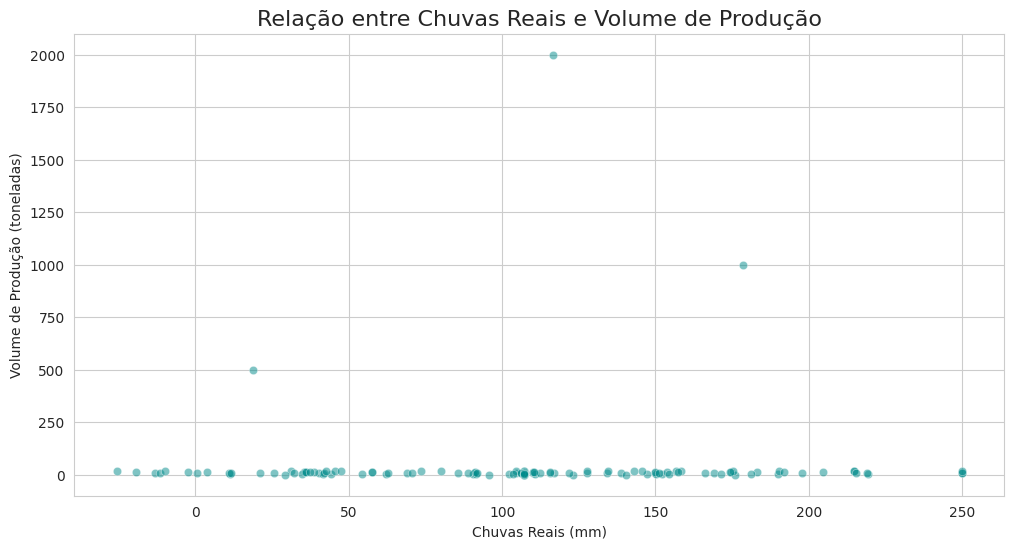

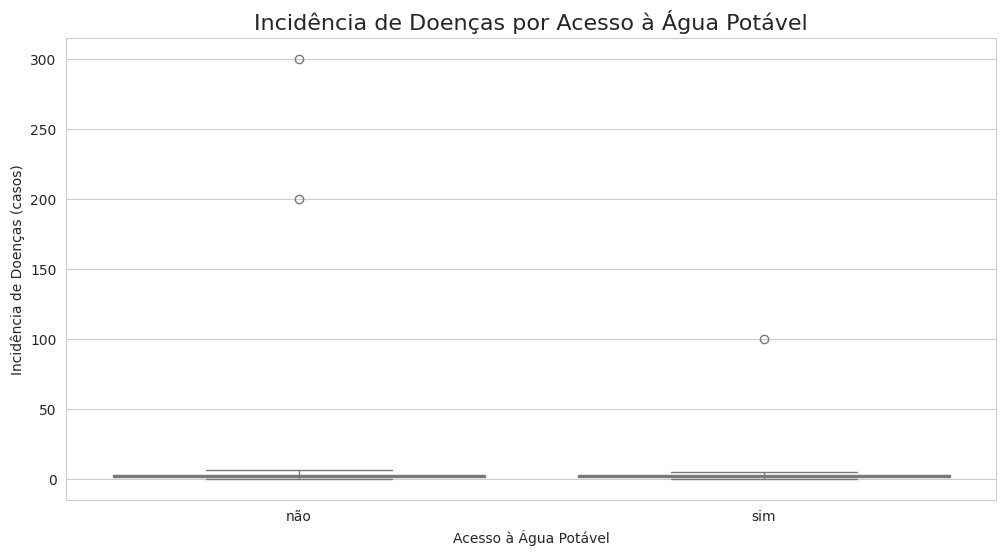

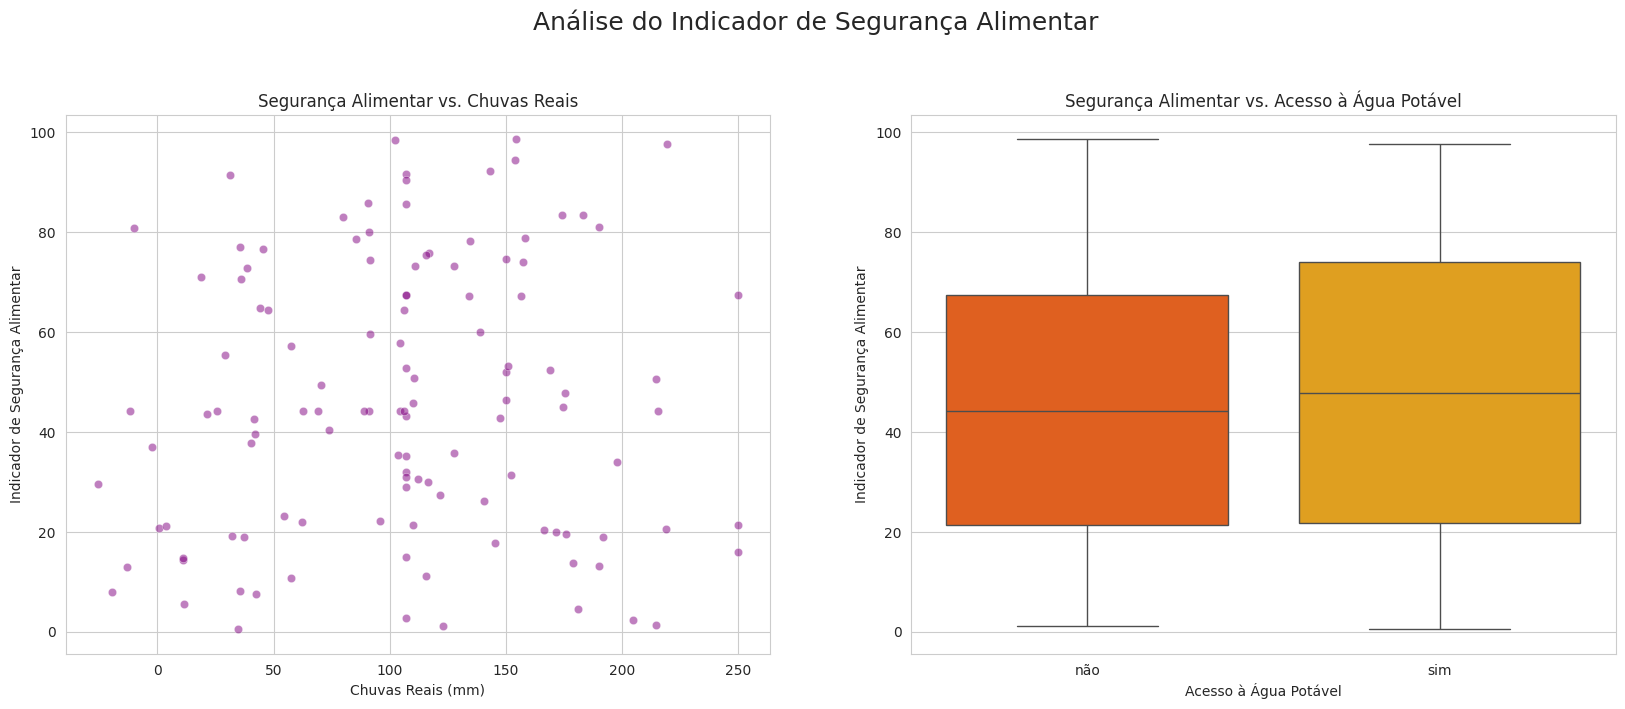

In [15]:
# 3.2. Respondendo aos Koans Analíticos (Análise Bivariada)

# Koan 1: Correlação Chuva-Produção
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='chuvas_reais_mm', y='volume_producao_tons', alpha=0.5, color='darkcyan')
plt.title('Relação entre Chuvas Reais e Volume de Produção', fontsize=16)
plt.xlabel('Chuvas Reais (mm)')
plt.ylabel('Volume de Produção (toneladas)')
plt.show()

# Koan 2: Impacto na Saúde (Doenças vs. Acesso à Água)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='acesso_agua_potavel', y='incidencia_doencas', palette='coolwarm')
plt.title('Incidência de Doenças por Acesso à Água Potável', fontsize=16)
plt.xlabel('Acesso à Água Potável')
plt.ylabel('Incidência de Doenças (casos)')
plt.show()

# Koan 3: Vulnerabilidade e Resiliência (Segurança Alimentar)
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
sns.scatterplot(data=df, x='chuvas_reais_mm', y='indicador_seguranca_alimentar', alpha=0.5, ax=axes[0], color='purple')
axes[0].set_title('Segurança Alimentar vs. Chuvas Reais')
axes[0].set_xlabel('Chuvas Reais (mm)')
axes[0].set_ylabel('Indicador de Segurança Alimentar')

sns.boxplot(data=df, x='acesso_agua_potavel', y='indicador_seguranca_alimentar', ax=axes[1], palette='autumn')
axes[1].set_title('Segurança Alimentar vs. Acesso à Água Potável')
axes[1].set_xlabel('Acesso à Água Potável')
axes[1].set_ylabel('Indicador de Segurança Alimentar')
plt.suptitle('Análise do Indicador de Segurança Alimentar', fontsize=18, y=1.03)
plt.show()



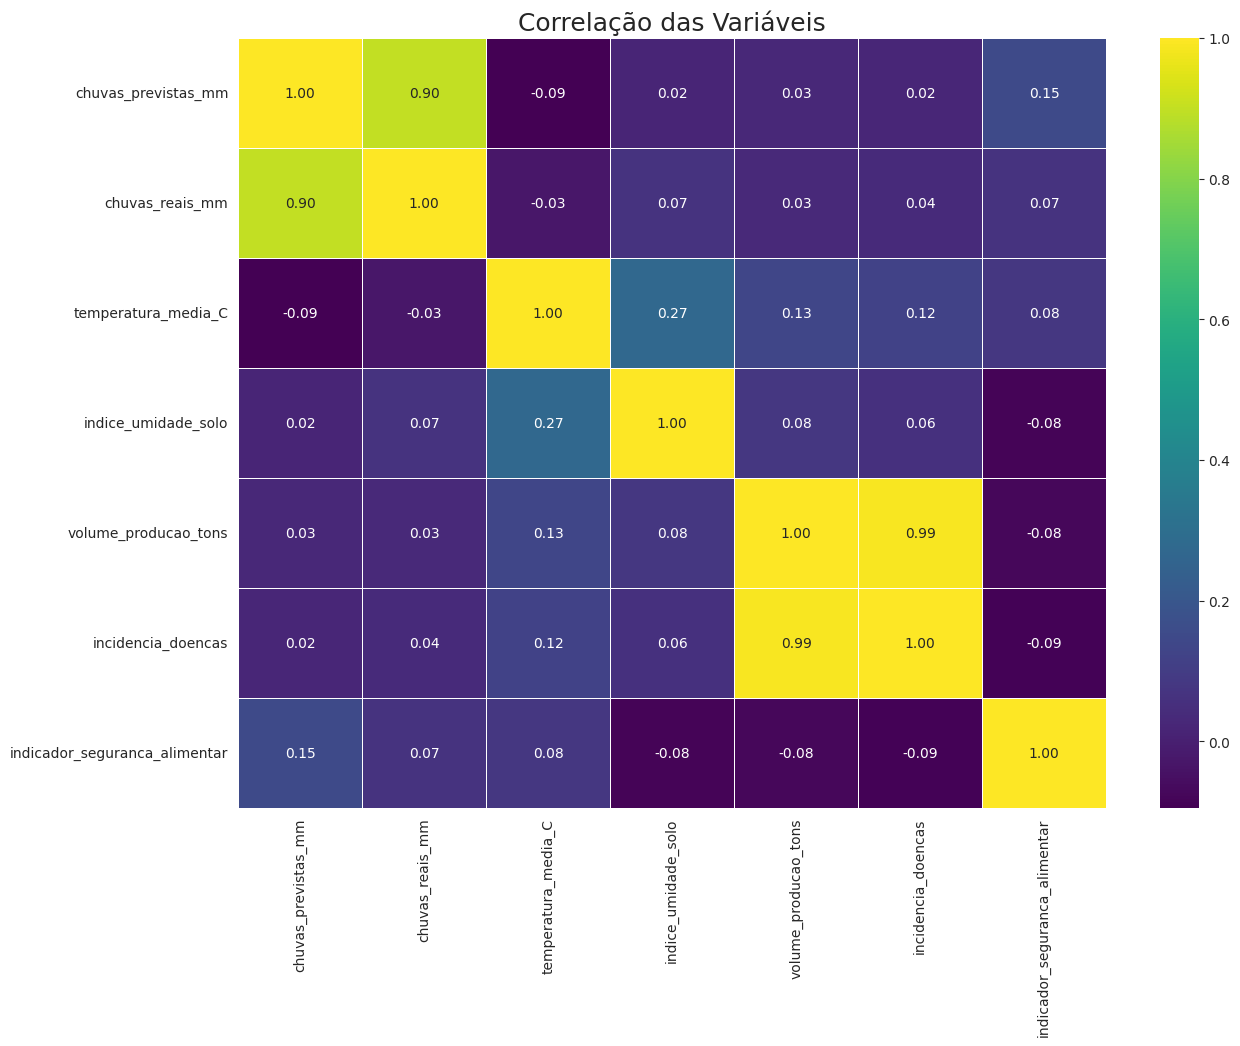


--- Análise Exploratória Concluída ---
As visualizações foram geradas. A Força revelou seus padrões.
Agora, é hora de interpretar estas revelações e construir nossa narrativa.


In [20]:
# 3.3. A Visão Completa (Matriz de Correlação)
# O Heatmap é nosso holocron, revelando todas as conexões de uma só vez.
df_numeric = df.select_dtypes(include=np.number)
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlação das Variáveis', fontsize=18)
plt.show()

print("\n--- Análise Exploratória Concluída ---")
print("As visualizações foram geradas. A Força revelou seus padrões.")
print("Agora, é hora de interpretar estas revelações e construir nossa narrativa.")